# 교육 데이터 분석

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 불러오기
df = pd.read_csv('/content/xAPI-Edu-Data.csv')

In [ ]:
from google.colab import data_table

# 데이터 속성 리스트
data_attributes = [
    [1, "gender", "학생의 성별", "범주형 ('Male', 'Female')"],
    [2, "NationalITy", "학생의 국적", "범주형 ('Kuwait', 'Lebanon', 'Egypt' 등)"],
    [3, "PlaceofBirth", "학생의 출생 국가", "범주형 ('Kuwait', 'Lebanon', 'Egypt' 등)"],
    [4, "StageID", "학생의 교육 단계", "범주형 ('LowerLevel', 'MiddleSchool', 'HighSchool')"],
    [5, "GradeID", "학생의 학년", "범주형 ('G-01' ~ 'G-12')"],
    [6, "SectionID", "학생의 반 ID", "범주형 ('A', 'B', 'C')"],
    [7, "Topic", "수업 과목", "범주형 ('English', 'Math', 'Science' 등)"],
    [8, "Semester", "학기 정보", "범주형 ('First', 'Second')"],
    [9, "Relation", "학생을 책임지는 부모", "범주형 ('Mom', 'Father')"],
    [10, "raisedhands", "수업 중 손을 든 횟수", "수치형 (0~100)"],
    [11, "VisITedResources", "학습 리소스 방문 횟수", "수치형 (0~100)"],
    [12, "AnnouncementsView", "공지사항 확인 횟수", "수치형 (0~100)"],
    [13, "Discussion", "토론 그룹 참여 횟수", "수치형 (0~100)"],
    [14, "ParentAnsweringSurvey", "부모 설문 조사 응답 여부", "범주형 ('Yes', 'No')"],
    [15, "ParentschoolSatisfaction", "부모의 학교 만족도", "범주형 ('Yes', 'No')"],
    [16, "StudentAbsenceDays", "학생의 결석 일수", "범주형 ('Above-7', 'Under-7')"]
]

# 데이터프레임 생성
df_attributes = pd.DataFrame(data_attributes, columns=["번호", "속성명", "설명", "데이터 유형"])

data_table.DataTable(df_attributes, include_index=False)

,번호,속성명,설명,데이터 유형
0,1,gender,학생의 성별,"범주형 ('Male', 'Female')"
1,2,NationalITy,학생의 국적,"범주형 ('Kuwait', 'Lebanon', 'Egypt' 등)"
2,3,PlaceofBirth,학생의 출생 국가,"범주형 ('Kuwait', 'Lebanon', 'Egypt' 등)"
3,4,StageID,학생의 교육 단계,"범주형 ('LowerLevel', 'MiddleSchool', 'HighSchool')"
4,5,GradeID,학생의 학년,범주형 ('G-01' ~ 'G-12')
5,6,SectionID,학생의 반 ID,"범주형 ('A', 'B', 'C')"
6,7,Topic,수업 과목,"범주형 ('English', 'Math', 'Science' 등)"
7,8,Semester,학기 정보,"범주형 ('First', 'Second')"
8,9,Relation,학생을 책임지는 부모,"범주형 ('Mom', 'Father')"
9,10,raisedhands,수업 중 손을 든 횟수,수치형 (0~100)


#### 데이터 전처리

In [ ]:
# 데이터 변환
# 속성에 대한 이해 및 계산을 용이하게 하기 위하여 Class 변수 H, M, L 을 각각 1, 2, 3으로 변환
df['Class'] = df['Class'].replace({'H': 1, 'M': 2, 'L': 3})
df.head()

<ipython-input-5-b234c3cd5e90>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class'] = df['Class'].replace({'H': 1, 'M': 2, 'L': 3})


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,3
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,3
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,2


In [ ]:
# 데이터 형태
df.shape

(480, 17)

In [ ]:
# 결측치 확인 - 결측치 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
# 이상치 확인 - 통계값
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333,1.968750
std,30.779223,33.080007,26.611244,27.637735,0.748738
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000,1.000000
50%,50.000000,65.000000,33.000000,39.000000,2.000000
75%,75.000000,84.000000,58.000000,70.000000,3.000000
max,100.000000,99.000000,98.000000,99.000000,3.000000


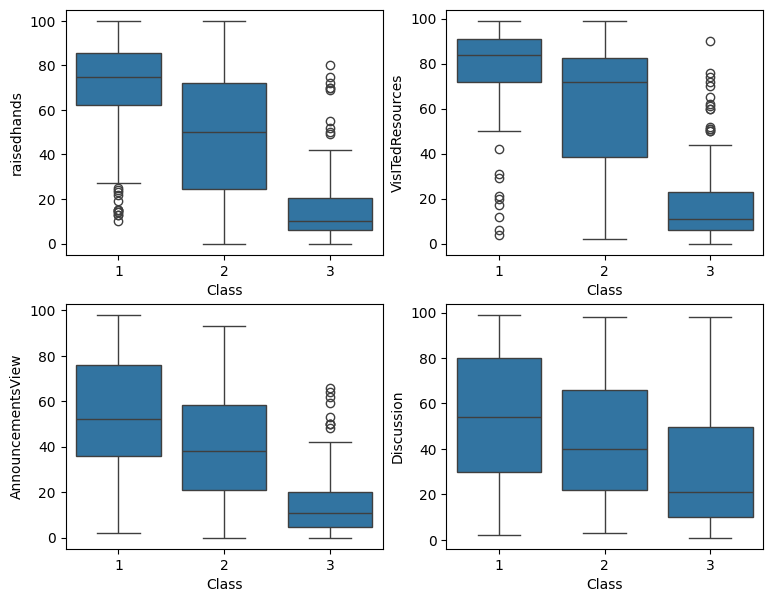

In [ ]:
# 이상치 확인 - 시각화
fig, axes = plt.subplots(2, 2, figsize=(9, 7))

sns.boxplot(x='Class', y='raisedhands', data=df, ax=axes[0, 0])
sns.boxplot(x='Class', y='VisITedResources', data=df, ax=axes[0, 1])
sns.boxplot(x='Class', y='AnnouncementsView', data=df, ax=axes[1, 0])
sns.boxplot(x='Class', y='Discussion', data=df, ax=axes[1, 1])

plt.show()

**데이터셋의 단위가 통일되어 있고, 변수마다 값의 범위가 크게 차이나지 않으며, 분포와 이상치가 적절한 상태여서 정규화/표준화를 하지 않음**

In [ ]:
# 중복행 확인 - 학기(Semester)가 달라 중복행 아님을 확인
df[df.duplicated()]

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
326,M,Jordan,Jordan,lowerlevel,G-02,A,French,F,Father,10,15,10,21,No,Bad,Above-7,3
327,M,Jordan,Jordan,lowerlevel,G-02,A,French,S,Father,30,10,20,5,No,Bad,Above-7,3


## 가설 설정

### **1. 부모(가정환경)와 성적에 대한 가설**
- 어머니가 자식의 교육에 더 관심이 많을 것이다.
- 학생을 책임지는 부모가 어머니인 경우 학생의 성적이 더 높을 것이다.
- 학부모가 학교에 만족할 수록, 학생들의 성적 역시 높을 것이다.


In [ ]:
df['Relation'].value_counts()

,count
Relation,
Father,283
Mum,197


In [ ]:
# 어머니/아버지별 설문 응답 수
df_relation = df.groupby('Relation')['ParentAnsweringSurvey'].value_counts().to_frame(name='count')

# 각 Relation 그룹에 대한 설문 응답 비율
df_relation['ratio'] = df_relation.groupby('Relation')['count'].transform(lambda x: (x / x.sum()) * 100)
df_relation['ratio'] = df_relation['ratio'].round(2)

df_relation

count  ratio
Relation ParentAnsweringSurvey              
Father   No                       143  50.53
         Yes                      140  49.47
Mum      Yes                      130  65.99
         No                        67  34.01

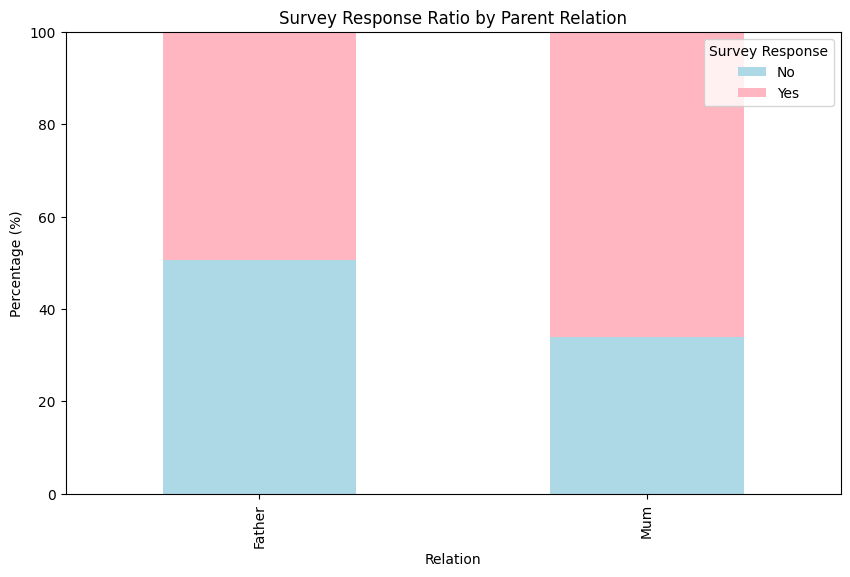

In [ ]:
# 시각화 - 누적형 막대 그래프
df_relation_pivot = df_relation.pivot_table(index='Relation', columns='ParentAnsweringSurvey', values='ratio', fill_value=0)
colors = ['#ADD8E6', '#FFB6C1']
ax = df_relation_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

plt.title("Survey Response Ratio by Parent Relation")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)
plt.legend(title="Survey Response", loc='upper right')

plt.show()

  - 아버지는 설문조사 응답 / 미응답 비율이 비슷한 양상을 보임    
  - 어머니는 설문조사 미응답 비율에 비해 응답 비율이 훨씬 높음을 보임. <br>
  ⇒ 어머니가 학생의 학교생활(교육)에 더 관심이 많다고 생각할 수 있음


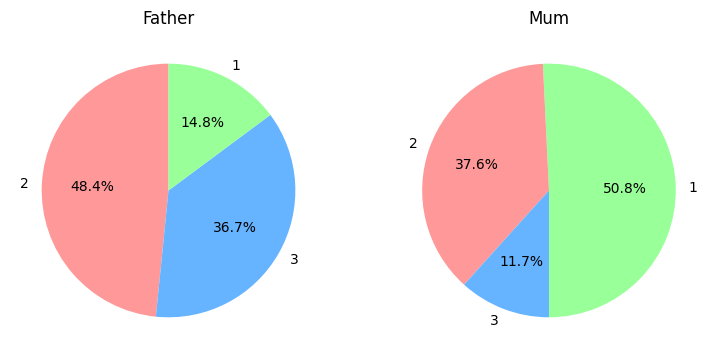

In [ ]:
# 어머니/아버지별 학생 Class 비율
df_male = df[df['Relation'] == 'Father']
df_female = df[df['Relation'] == 'Mum']

category_counts_male = df_male['Class'].value_counts()
category_counts_female = df_female['Class'].value_counts()


# 시각화 - 파이 차트
fig, axes = plt.subplots(1, 2, figsize=(9, 7))

axes[0].pie(category_counts_male, labels=category_counts_male.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
axes[0].set_title('Father')
axes[1].pie(category_counts_female, labels=category_counts_female.index, autopct='%1.1f%%', startangle=-90, colors=['#99ff99', '#ff9999', '#66b3ff'])
axes[1].set_title('Mum')

plt.show()

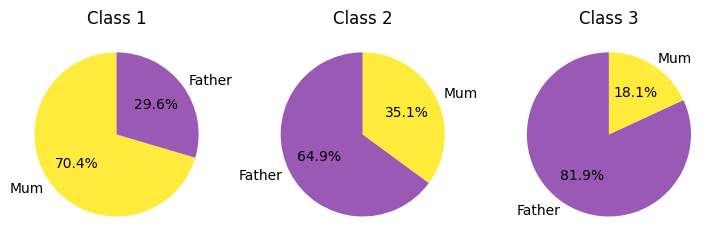

In [ ]:
# 학생 Class별 어머니/아버지 비율 확인
fig, axes = plt.subplots(1, 3, figsize=(9, 7))
color = {'Father':'#9b59b6','Mum':'#ffeb3b'}

for i, n in enumerate([1, 2, 3]):
    df_class = df[df['Class'] == n]

    relation_counts = df_class['Relation'].value_counts()

    colors = [color[relation] for relation in relation_counts.index]

    axes[i].pie(relation_counts, labels=relation_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].set_title(f'Class {n}')

plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.tools import add_constant
from scipy import stats

# 카이제곱 검정
contingency_table = pd.crosstab(df['Relation'], df['Class'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("✅ 학부모와 성적 간에 통계적으로 유의미한 관계가 존재함 (p < 0.05)")
else:
    print("❌ 학부모와 성적 간에 통계적으로 유의미한 관계가 존재하지 않음 (p >= 0.05)")

Chi-squared Statistic: 81.366
P-value: 0.00000
✅ 학부모와 성적 간에 통계적으로 유의미한 관계가 존재함 (p < 0.05)


<결론>
- 아이를 케어하는 사람이(등록된 학부모가) 어머니인 경우가 아버지인 경우보다 아이들의 교육에 관심이 더 많을 것이라고 생각하였다.
- 데이터 분석 결과, 어머니가 학생의 학교생활(교육)에 더 관심이 많음 편임을 확인할 수 있었으며, 어머니에게 케어받는 학생들 중 50.8%가 가장 높은 성적으로 아버지에게 케어받는 학생들 중 14.8%가 가장 높은 성적을 받은 것에 비해 높은 수치를 보인다.
- Class 1인 학생 전체를 보았을 때도 학부모가 어머니인 학생의 비율이 월등히 높다.
- 카이제곱 검정 결과, p-value < 0.05 로 귀무가설을 기각하여 학부모에 따른 성적의 차이가 통계적으로 유의미함을 보인다.

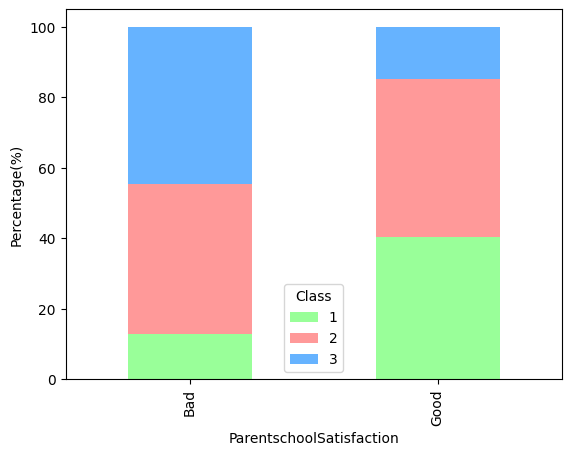

In [ ]:
# 부모의 학교 만족도별 성적 분포
Satisfaction = pd.crosstab(df['ParentschoolSatisfaction'], df['Class'])
Satisfaction_ratio = Satisfaction.div(Satisfaction.sum(axis=1), axis=0)
Satisfaction_percentage = Satisfaction_ratio * 100
Satisfaction_percentage.plot(kind='bar', stacked=True, color=['#99ff99', '#ff9999', '#66b3ff'])

plt.xlabel('ParentschoolSatisfaction')
plt.ylabel('Percentage(%)')

plt.show()

부모가 학교에 만족도가 높을 수록, 상위권 성적인 아이의 비율이 더 높다.

### **2. 학습 참여도와 성적에 대한 가설**
- 결석이 적을 수록 학생의 성적이 더 높을 것이다.
- 학생들의 수업 참여도가 높을수록 성적이 좋을 것이며, 특히 '수업 중 손들기'나 '토론 그룹 참여'가 많을수록(교실에서의 참여도가 좋을 수록) 학생 성적이 더 높을 것이다.
  - 유난히 참여도가 낮은데도 좋은 성적을 유지하는 학생들은 어떤 학생들일까?

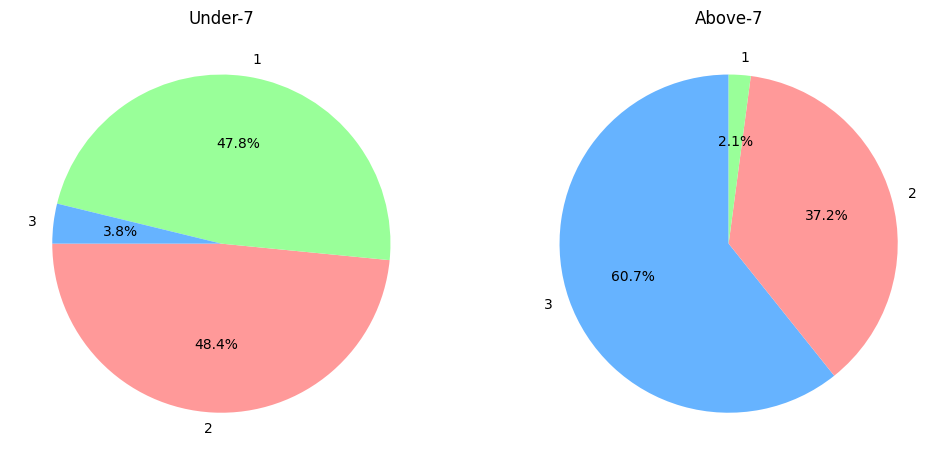

In [ ]:
# 시각화 - 파이 차트
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df_under7 = df[df['StudentAbsenceDays'] == 'Under-7']
category_counts = df_under7['Class'].value_counts()
axes[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=-180, colors=['#ff9999', '#99ff99', '#66b3ff'])  # 빨강, 초록, 파랑
axes[0].set_title('Under-7')
df_above7 = df[df['StudentAbsenceDays'] == 'Above-7']
category_counts = df_above7['Class'].value_counts()
axes[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99'])  # 파랑, 빨강, 초록
axes[1].set_title('Above-7')

plt.show()

In [ ]:
contingency_table = pd.crosstab(df['StudentAbsenceDays'], df['Class'])

# 카이제곱 검정
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("✅ 출석 일수와 성적 간에 통계적으로 유의미한 관계가 존재함 (p < 0.05)")
else:
    print("❌ 출석 일수와 성적 간에 통계적으로 유의미한 관계가 존재하지 않음 (p >= 0.05)")

Chi-squared Statistic: 225.205
P-value: 0.00000
✅ 출석 일수와 성적 간에 통계적으로 유의미한 관계가 존재함 (p < 0.05)


<결론>
- 결석이 7일 미만인 학생들의 성적이 결석이 7일 이상인 학생들에 비해 월등히 높다.
- 카이제곱 검정 결과, p-value < 0.05 로 귀무가설을 기각하여 출석률에 따른 성적의 차이가 통계적으로 유의미함을 보인다.

In [ ]:
corr_col = df[['raisedhands','Discussion', 'VisITedResources','AnnouncementsView','Class']].corr()['Class']

# 숫자로만 보면 1이 3보다 작으므로 상관계수가 음수로 출력 / 절대값 처리

corr_abs = corr_col.abs()
corr_abs

,Class
raisedhands,0.646298
Discussion,0.308183
VisITedResources,0.677094
AnnouncementsView,0.527370
Class,1.000000


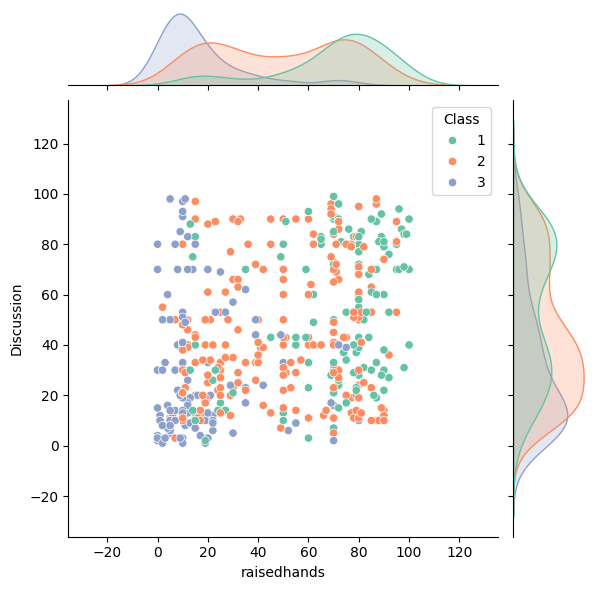

In [ ]:
sns.jointplot(x='raisedhands', y='Discussion', data=df, kind='scatter', hue='Class', hue_order=[1, 2, 3], palette='Set2')
plt.show()

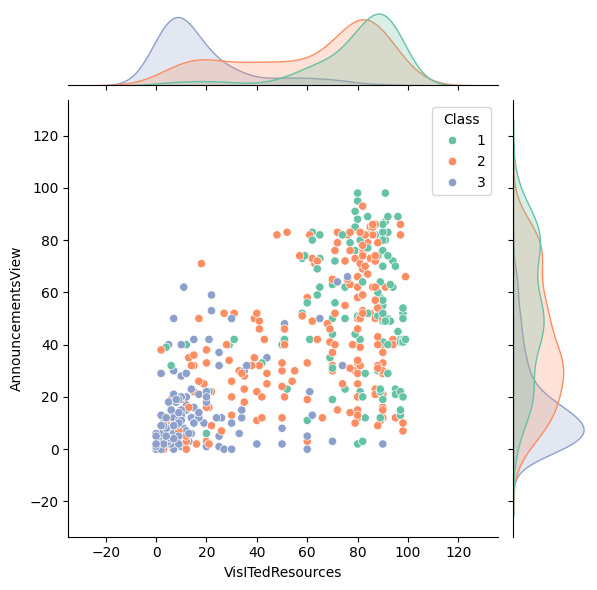

In [ ]:
sns.jointplot(x='VisITedResources', y='AnnouncementsView', data=df, kind='scatter', hue='Class', hue_order=[1, 2, 3], palette='Set2')
plt.show()

In [ ]:
# 다항 로지스틱 회귀분석
X = df["raisedhands"]
X = add_constant(X)  # 절편 추가
Y = df["Class"]

model = sm.MNLogit(Y, X)
result = model.fit()

print(result.summary())

p_values = result.pvalues.iloc[1]
if p_values.min() < 0.05:
    print("✅ VisITedResources에 따른 Class 차이가 통계적으로 유의미함 (p < 0.05)")
else:
    print("❌ VisITedResources에 따른 Class 차이가 통계적으로 유의미하지 않음 (p >= 0.05)")

Optimization terminated successfully.
         Current function value: 0.809183
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                  Class   No. Observations:                  480
Model:                        MNLogit   Df Residuals:                      476
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.2462
Time:                        06:59:56   Log-Likelihood:                -388.41
converged:                       True   LL-Null:                       -515.24
Covariance Type:            nonrobust   LLR p-value:                 8.304e-56
    Class=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.3781      0.335      7.104      0.000       1.722       3.034
raisedhands    -0.0327    

In [ ]:
# 다항 로지스틱 회귀분석
X = df["Discussion"]
X = add_constant(X)  # 절편 추가
Y = df["Class"]

model = sm.MNLogit(Y, X)
result = model.fit()

print(result.summary())

p_values = result.pvalues.iloc[1]
if p_values.min() < 0.05:
    print("✅ VisITedResources에 따른 Class 차이가 통계적으로 유의미함 (p < 0.05)")
else:
    print("❌ VisITedResources에 따른 Class 차이가 통계적으로 유의미하지 않음 (p >= 0.05)")

Optimization terminated successfully.
         Current function value: 1.022829
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                  Class   No. Observations:                  480
Model:                        MNLogit   Df Residuals:                      476
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                 0.04712
Time:                        06:59:56   Log-Likelihood:                -490.96
converged:                       True   LL-Null:                       -515.24
Covariance Type:            nonrobust   LLR p-value:                 2.858e-11
   Class=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0266      0.226      4.536      0.000       0.583       1.470
Discussion    -0.0130      0.

In [ ]:
# 다항 로지스틱 회귀분석
X = df["VisITedResources"]
X = add_constant(X)  # 절편 추가
Y = df["Class"]

model = sm.MNLogit(Y, X)
result = model.fit()

print(result.summary())

p_values = result.pvalues.iloc[1]
if p_values.min() < 0.05:
    print("✅ VisITedResources에 따른 Class 차이가 통계적으로 유의미함 (p < 0.05)")
else:
    print("❌ VisITedResources에 따른 Class 차이가 통계적으로 유의미하지 않음 (p >= 0.05)")

Optimization terminated successfully.
         Current function value: 0.778777
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                  Class   No. Observations:                  480
Model:                        MNLogit   Df Residuals:                      476
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.2745
Time:                        06:59:56   Log-Likelihood:                -373.81
converged:                       True   LL-Null:                       -515.24
Covariance Type:            nonrobust   LLR p-value:                 3.809e-62
         Class=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.6919      0.431      6.252      0.000       1.848       3.536
VisITedReso

In [ ]:
# 다항 로지스틱 회귀분석
X = df["AnnouncementsView"]
X = add_constant(X)  # 절편 추가
Y = df["Class"]

model = sm.MNLogit(Y, X)
result = model.fit()

print(result.summary())

p_values = result.pvalues.iloc[1]
if p_values.min() < 0.05:
    print("✅ VisITedResources에 따른 Class 차이가 통계적으로 유의미함 (p < 0.05)")
else:
    print("❌ VisITedResources에 따른 Class 차이가 통계적으로 유의미하지 않음 (p >= 0.05)")

Optimization terminated successfully.
         Current function value: 0.888173
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                  Class   No. Observations:                  480
Model:                        MNLogit   Df Residuals:                      476
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.1726
Time:                        06:59:56   Log-Likelihood:                -426.32
converged:                       True   LL-Null:                       -515.24
Covariance Type:            nonrobust   LLR p-value:                 2.430e-39
          Class=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.3331      0.245      5.452      0.000       0.854       1.812
Announce

<결론>
- 상관계수 수치를 보았을 때, 0.7 이상의 수치가 나오지 않는다.
- 시각화 자료를 보았을 때, 분포가 고르게 되어있는 편임을 알 수 있다.
- 전체적으로 상관관계가 있는 편이지만, 예외사항들로 인해 절대적인 요인으로 단정지을 수는 없다.
- 가설로 예상했던 것과 달리 성적에 대한 '토론 그룹 참여'의 상관계수가 많이 낮으며, 대신 '자료 확인'이 더 높은 상관관계로 나타남을 확인하였다.
- 로지스틱 회귀분석 결과, p-value < 0.05 로 귀무가설을 기각하여 참여 변수에 따른 성적의 차이가 통계적으로 유의미함을 보인다.

[추가 의문] 손들기, 자료 확인이 적은 학생 중 성적이 높은 경우는 어떤 영향을 받은 것일까?

In [ ]:
# Class 1 학생 중 자료 확인이 적은 학생 조회
class1_students = df[df["Class"] == 1]

visited_q1 = class1_students["VisITedResources"].quantile(0.25)
visited_q3 = class1_students["VisITedResources"].quantile(0.75)
IQR = visited_q3 - visited_q1
lower_bound = visited_q1 - 0.5 * IQR

low_visited_students = class1_students[class1_students['VisITedResources'] <= lower_bound ]
low_visited_students[["VisITedResources", "raisedhands", "AnnouncementsView", "Discussion"]]

,VisITedResources,raisedhands,AnnouncementsView,Discussion
19,50,70,40,99
47,4,70,39,90
86,12,70,40,50
96,60,14,11,75
117,29,25,40,17
155,58,70,73,91
168,52,60,23,33
170,62,40,83,33
176,52,60,23,33
178,42,80,33,13


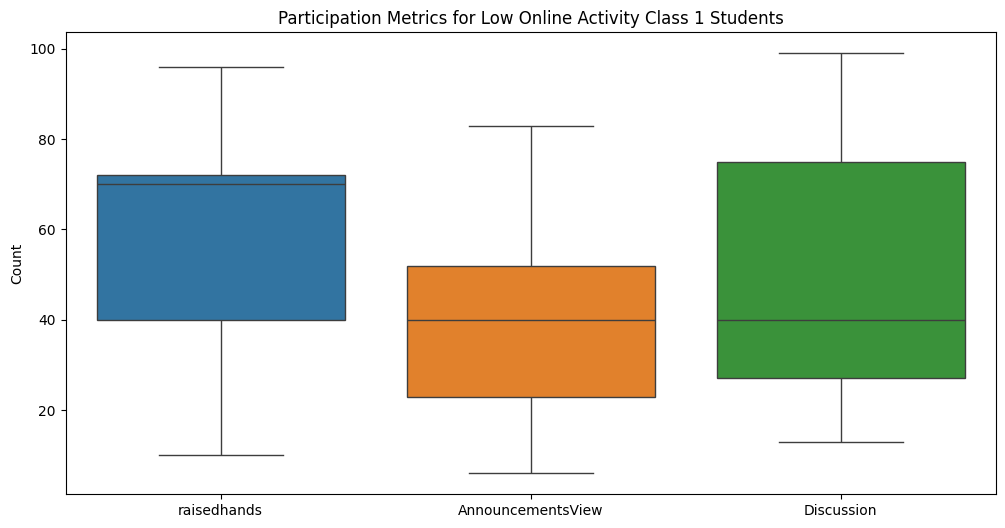

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=low_visited_students[["raisedhands", "AnnouncementsView", "Discussion"]])
plt.title("Participation Metrics for Low Online Activity Class 1 Students")
plt.ylabel("Count")

plt.show()

**성적이 좋지만 자료를 적게 활용하는 학생들은 토론에 많이 참여하고 있다는 것을 확인할 수 있다.**

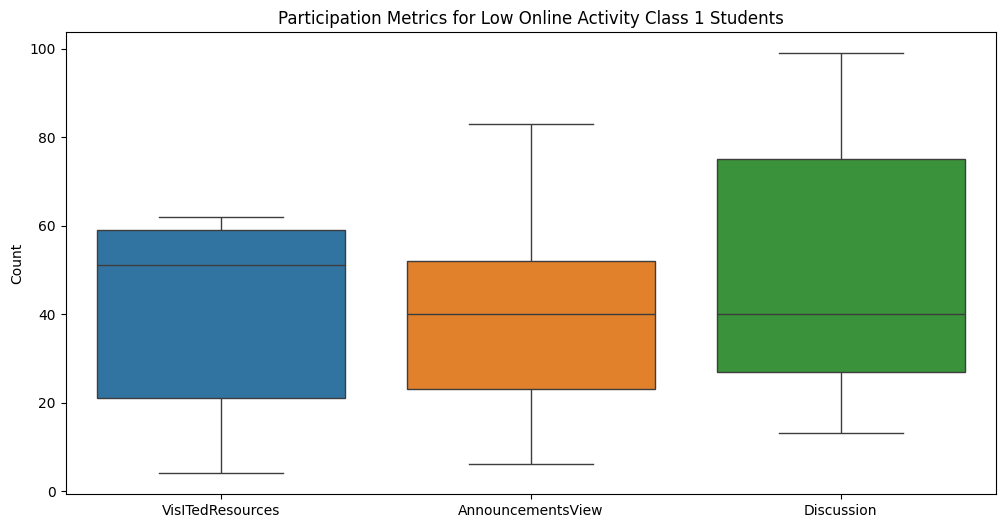

In [ ]:
raised_q1 = class1_students["raisedhands"].quantile(0.25)
raised_q3 = class1_students["raisedhands"].quantile(0.75)
IQR = raised_q3 - raised_q1
lower_bound = raised_q1 - 0.5 * IQR
low_raised_students= class1_students[class1_students['raisedhands'] <= lower_bound ]

plt.figure(figsize=(12, 6))
sns.boxplot(data=low_visited_students[["VisITedResources", "AnnouncementsView", "Discussion"]])
plt.title("Participation Metrics for Low Online Activity Class 1 Students")
plt.ylabel("Count")
plt.show()

**성적이 좋지만 손을 잘 들지 않는 학생들 또한 토론에 많이 참여하고 있다는 것을 확인할 수 있다.**

In [ ]:
# Class 1 학생 중 VisITedResources가 적은 학생
Q1 = df[df['Class'] == 1]['VisITedResources'].quantile(0.25)
Q3 = df[df['Class'] == 1]['VisITedResources'].quantile(0.75)
IQR = Q3 - Q1

df_outliers_VisITedResources = df[
    (df['Class'] == 1) &
    (df['VisITedResources'] < (Q1 - 1.5 * IQR))]  # 이상치 기준 적용

In [ ]:
# Class 1 학생 중 raisedhands가 적은 학생
Q1 = df[df['Class'] == 1]['raisedhands'].quantile(0.25)
Q3 = df[df['Class'] == 1]['raisedhands'].quantile(0.75)
IQR = Q3 - Q1

df_outliers_raisedhands = df[
    (df['Class'] == 1) &
    (df['raisedhands'] < (Q1 - 1.5 * IQR))]  # 이상치 기준 적용

In [ ]:
# 두 데이터프레임의 공통 학생 찾기(교집합)
df_outliers_common = df_outliers_VisITedResources.merge(df_outliers_raisedhands, how='inner')
df_outliers_common

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Subject_classification
0,F,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Mum,25,29,40,17,No,Good,Under-7,1,Science
1,M,KW,KuwaIT,lowerlevel,G-04,A,Math,S,Father,15,6,32,40,Yes,Good,Under-7,1,Science
2,M,KW,KuwaIT,lowerlevel,G-04,A,History,S,Father,10,17,12,40,Yes,Good,Under-7,1,Liberal Arts
3,M,Jordan,Jordan,MiddleSchool,G-06,A,English,S,Father,22,20,6,26,No,Bad,Under-7,1,Liberal Arts


<결론>
- 성적이 좋으면서 '손들기'나 '자료 확인'이 적은 특이한 패턴의 학생들의 경우, 토론 참여가 높거나 학부모의 만족도가 높다는 특징이 있다.
- 참여도 외에 다른 외부적 요인 역시 복합적으로 작용할 수 있음을 보인다.


### **3. 학년과 성적에 대한 가설**
- 같은 과목이어도 학년이 올라갈수록 평균 성적이 더 낮을 것이다.

In [ ]:
df['StageID'].value_counts()

,count
StageID,
MiddleSchool,248
lowerlevel,199
HighSchool,33


In [ ]:
# 과목별 & 교육 단계별 성적 분포
pivot_df_topic = df.pivot_table(index=['Topic', 'StageID'], columns='Class', aggfunc='size', fill_value=0)
pivot_df_topic

Class                    1   2   3
Topic     StageID                 
Arabic    MiddleSchool   9  13   6
          lowerlevel    10  10  11
Biology   MiddleSchool  16  10   4
Chemistry MiddleSchool  10   6   8
English   HighSchool     3   4   4
          MiddleSchool  13  14   1
          lowerlevel     1   0   5
French    HighSchool     0   1   0
          lowerlevel    20  28  16
Geology   MiddleSchool   6  18   0
History   MiddleSchool   2   8   2
          lowerlevel     2   4   1
IT        HighSchool     2   6   2
          MiddleSchool   2  13   8
          lowerlevel    11  23  28
Math      HighSchool     2   0   0
          MiddleSchool   3   7   7
          lowerlevel     1   1   0
Quran     HighSchool     2   1   1
          MiddleSchool   6   7   5
Science   HighSchool     2   2   0
          MiddleSchool   4  10   6
          lowerlevel    10  13   4
Spanish   HighSchool     0   0   1
          MiddleSchool   5  12   7

In [ ]:
# 과목별 & 교육 단계별 성적 분포(비율)
pivot_df_topic_ratio = pivot_df_topic.div(pivot_df_topic.sum(axis=1), axis=0) * 100
pivot_df_topic_ratio = pivot_df_topic_ratio.round(0)

pivot_df_topic_ratio

Class                       1      2      3
Topic     StageID                          
Arabic    MiddleSchool   32.0   46.0   21.0
          lowerlevel     32.0   32.0   35.0
Biology   MiddleSchool   53.0   33.0   13.0
Chemistry MiddleSchool   42.0   25.0   33.0
English   HighSchool     27.0   36.0   36.0
          MiddleSchool   46.0   50.0    4.0
          lowerlevel     17.0    0.0   83.0
French    HighSchool      0.0  100.0    0.0
          lowerlevel     31.0   44.0   25.0
Geology   MiddleSchool   25.0   75.0    0.0
History   MiddleSchool   17.0   67.0   17.0
          lowerlevel     29.0   57.0   14.0
IT        HighSchool     20.0   60.0   20.0
          MiddleSchool    9.0   57.0   35.0
          lowerlevel     18.0   37.0   45.0
Math      HighSchool    100.0    0.0    0.0
          MiddleSchool   18.0   41.0   41.0
          lowerlevel     50.0   50.0    0.0
Quran     HighSchool     50.0   25.0   25.0
          MiddleSchool   33.0   39.0   28.0
Science   HighSchool     50.0   50.0    0.0
          MiddleSchool   20.0   50.0   30.0
          lowerlevel     37.0   48.0   15.0
Spanish   HighSchool      0.0    0.0  100.0
          MiddleSchool   21.0   50.0   29.0

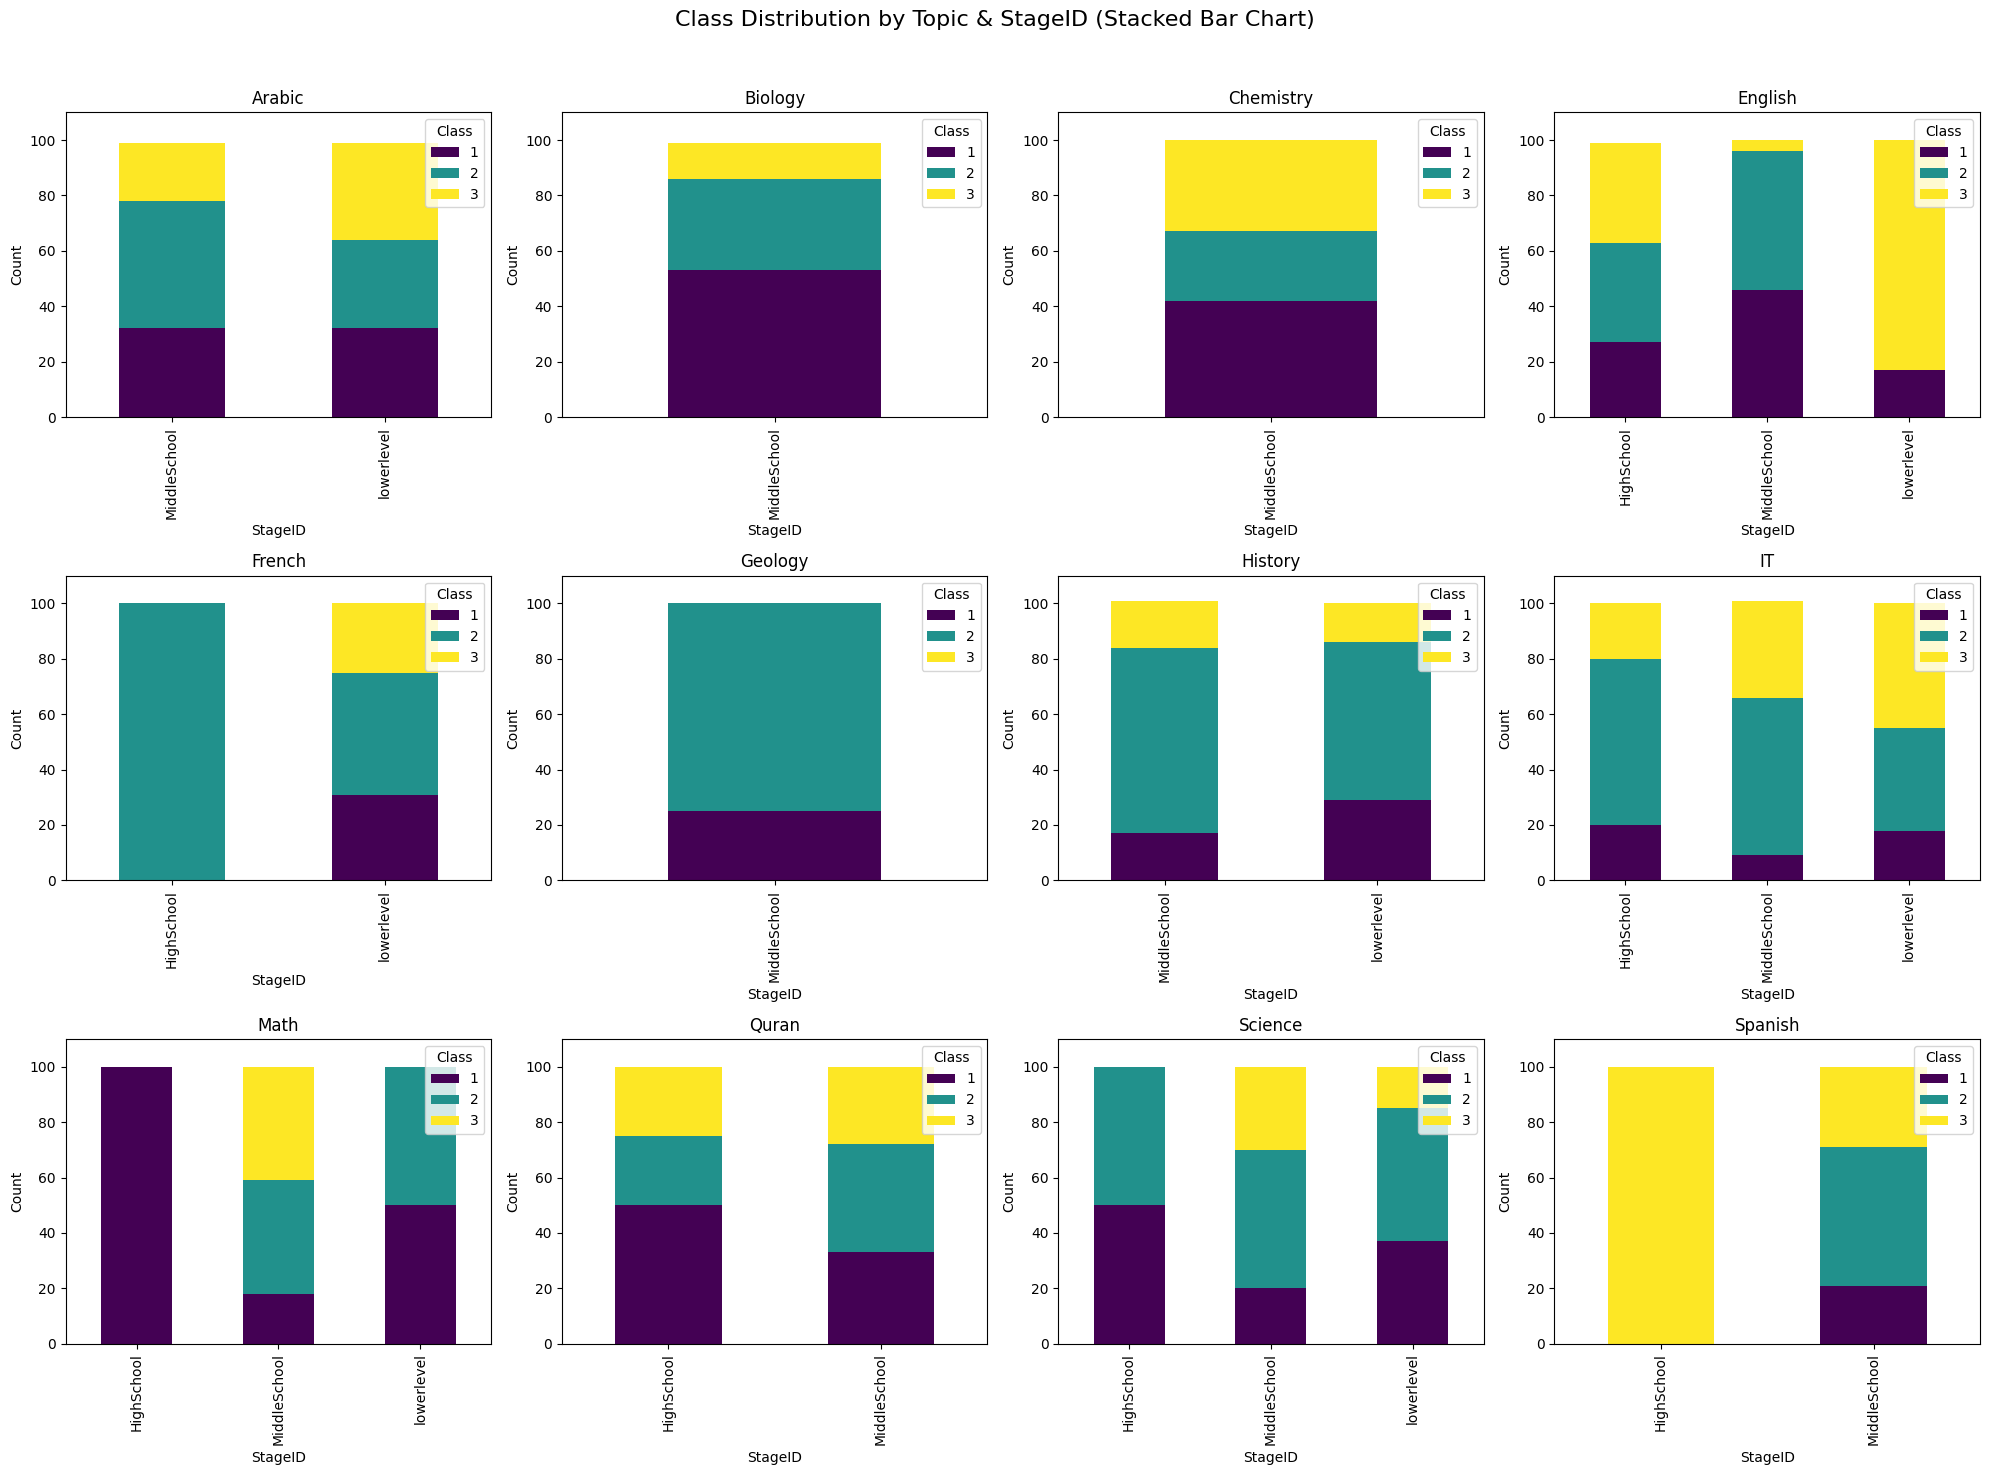

In [ ]:
# 시각화 - 누적 막대 그래프
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle("Class Distribution by Topic & StageID (Stacked Bar Chart)", fontsize=16)

topics = pivot_df_topic_ratio.index.get_level_values('Topic').unique()

for ax, topic in zip(axes.flat, topics):
    pivot_df_topic_ratio.loc[topic].plot(kind='bar', stacked=True,  colormap='viridis', ax=ax, title=topic)
    ax.set_ylabel("Count")
    ax.set_ylim(0, pivot_df_topic_ratio.max().max() * 1.1)
    ax.legend(title="Class", loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- 한 학년만 있어서 비교가 불가능한 과목은 분석에서 제외
  - 인문계열 과목: Geology
  - 자연/공학계열 과목: Biology, Chemistry

- **학년이 올라갈수록 Class 3 비율이 높아진 과목**
  - 인문계열 과목
    - English(MiddleSchool -> HighSchool)
    - Spanish(MIddleSchool -> HighSchool)
  - 자연/공학계열 과목
    - Math(lowerlevel -> MiddleSchool)
    - Science(lowerlevel -> MiddleSchool)

- **학년이 올라갈수록 Class 1 비율이 낮아진 과목**
    - 인문계열 과목
      - English(MiddleSchool -> HighSchool)
      - French(lowerlevel -> HighSchool)
      - History(lowerlevel -> MiddleSchool)
      - Spanish(MIddleSchool -> HighSchool)
    - 자연/공학계열 과목
      - IT(lowerlevel -> MiddleSchool)
      - Math(lowerlevel -> MiddleSchool)
      - Science(lowerlevel -> MiddleSchool)

In [ ]:
# StageID (학년)와 Class (성적) 간의 빈도수 테이블 생성
contingency_table = pd.crosstab(df["StageID"], df["Class"])

# 카이제곱 검정 실행
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
chi2_stat, p, dof, expected

# 카이제곱 검정 결과 출력 (지정된 형식)
print("카이제곱 검정 결과")
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"p-value: {p}")

카이제곱 검정 결과
Chi-Square Test Statistic: 7.09896311215469
p-value: 0.13074998727949988


<결론>
- 똑같은 과목이어도 학년이 올라갈 수록 평균 성적이 더 낮을 것이라 예상하였고, 데이터를 시각화하였을 때 TRUE인 것으로 보이나, **통계적으로 유의미하지 않았다.**
  - 총 12과목 중 비교 분석이 불가능한 3과목을 제외하였을 때, 9과목 중 7과목에서 교육 단계가 올라갈 수록 평균 성적이 낮아지는 추세를 보인다.
- 이러한 경향은 자연/공학계열에서 더욱 두드러지는 경향이 있을 것이라 예상하였으나, 데이터를 시각화하였을 때 FALSE인 동시에 **통계적으로 유의미하지 않았다.**
  - 이러한 추세를 보이는 과목의 수는 인문계열에서 더 많다.
  - 자연/공학계열 과목은 중학교 성적이 떨어지는 것에 비해, 인문계열 과목은 고등학교 성적이 떨어지는 추세를 보이기 때문에 교육 단계가 올라갈 수록 평균 성적이 더 낮아지는 추세가 자연/공학계열에서 두드러진다는 것은 거짓이다.
- 결과적으로 학년 자체가 성적을 결정짓는 핵심 요인이 아님을 알 수 있었다.

[추가의문] 학년별로 (상위권) 학생들의 수업 참여도가 다를까?

In [ ]:
#1등급 학년 별로 수업태도 평균
df[df['Class'] == 1].groupby('StageID').agg({'raisedhands':'mean','VisITedResources':'mean','AnnouncementsView':'mean','Discussion':'mean'})

,raisedhands,VisITedResources,AnnouncementsView,Discussion
StageID,,,,
HighSchool,67.272727,71.000000,56.363636,71.272727
MiddleSchool,77.118421,81.223684,58.328947,60.157895
lowerlevel,61.454545,76.872727,45.945455,41.163636


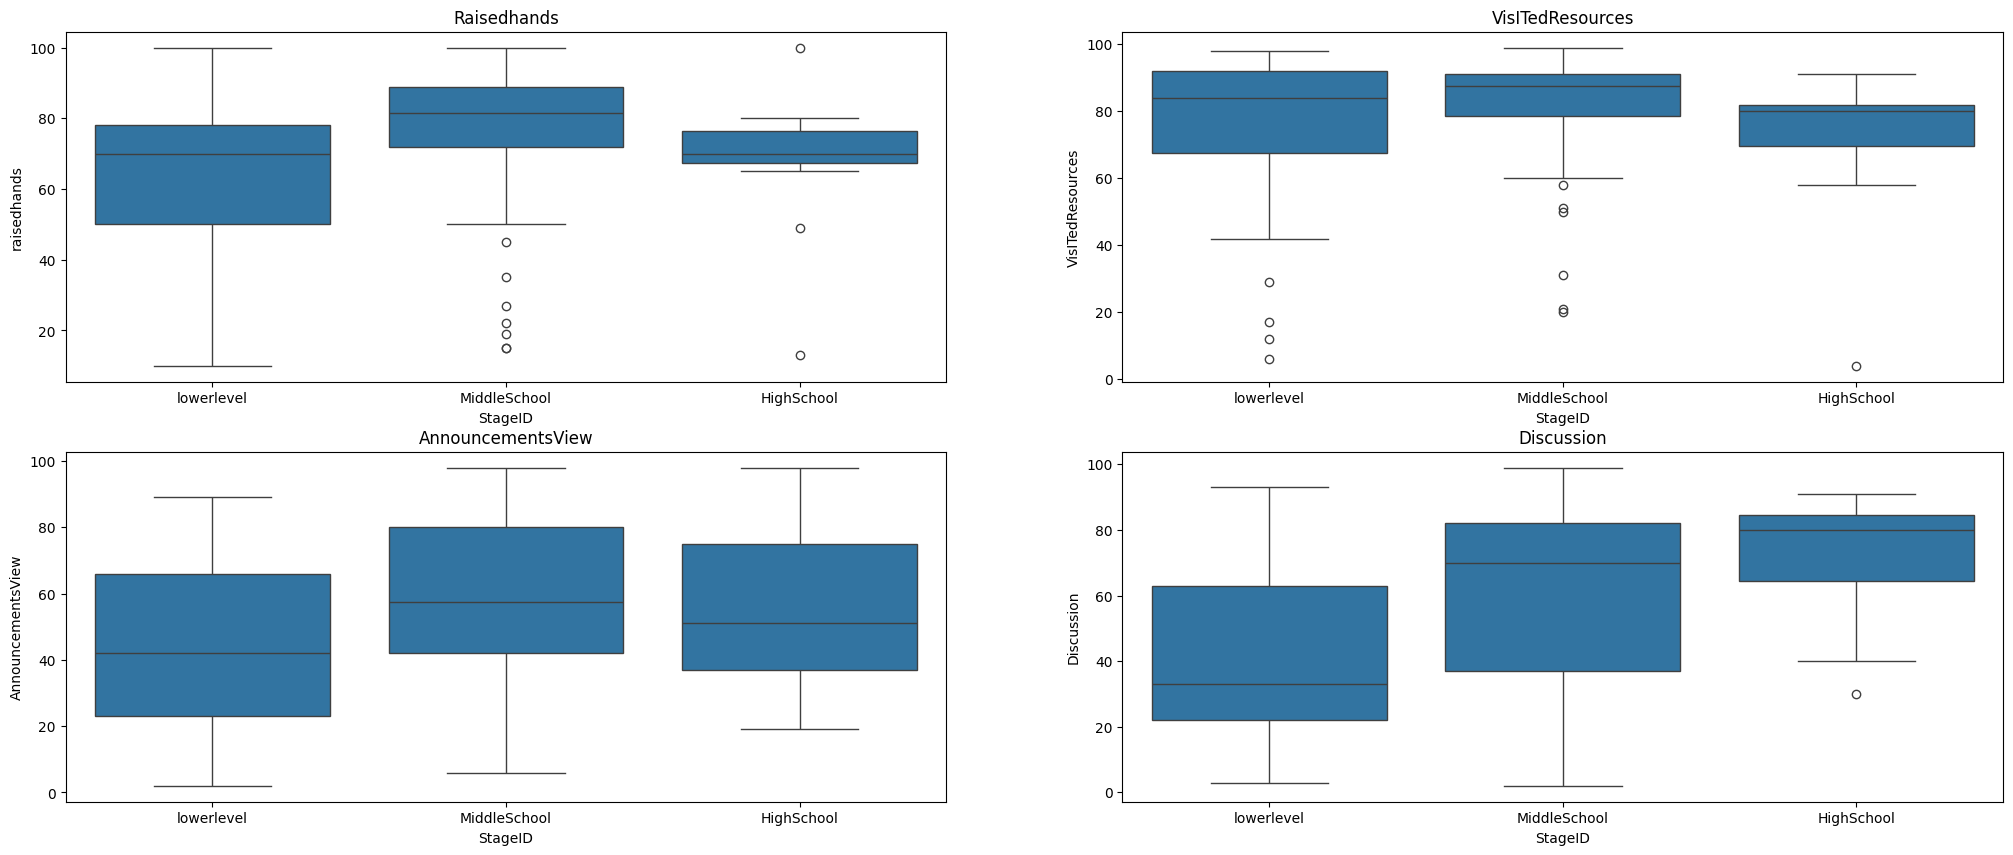

In [ ]:
#시각화
order = ["lowerlevel","MiddleSchool","HighSchool" ]
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
plt.title('Raisedhands')
sns.boxplot(x='StageID',y='raisedhands',data=df[df['Class']==1],order=order)
plt.subplot(2,2,2)
plt.title('VisITedResources')
sns.boxplot(x='StageID',y='VisITedResources',data=df[df['Class']==1],order=order)
plt.subplot(2,2,3)
plt.title('AnnouncementsView')
sns.boxplot(x='StageID',y='AnnouncementsView',data=df[df['Class']==1],order=order)
plt.subplot(2,2,4)
plt.title('Discussion')
sns.boxplot(x='StageID',y='Discussion',data=df[df['Class']==1],order=order)

plt.show()

- Raisedhands: Middleschool 수치가 두 학년 보다 높은 수치를 보여주고 변동성 크지 않다. 다만, Highschool 수치는 비교적 낮지만 변동성 크지 않아 질적으로 수업 참여도 기여를 했다고 판단된다.
- VisITedResources: 학년별로 높은 수치가 보이고 변동성 적다.
- AnnouncementsView: 학년별로 수치가 평균이고 변동성이 일정하다.
- Discussion: Highschool 제외한 두 학년에 변동성이 있어 토론 하는 것에 차이가 난다. 특히, lowerlevel는 비교적 낮은 수치가 보여진다.

### **4. 성별과 성적에 대한 가설**
- 여학생은 인문계열 과목에서 더 높은 성적을 보일 것이다.
- 남학생은 자연/공학계열 과목에서 더 높은 성적을 보일 것이다.

In [ ]:
# 과목별 분류
df['Subject_Type'] = df['Topic'].map({
    'Arabic': 'Literature',
    'English': 'Literature',
    'Spanish': 'Literature',
    'French': 'Literature',
    'History': 'Literature',
    'Quran': 'Literature',
    'Math': 'Science',
    'IT': 'Science',
    'Science': 'Science',
    'Biology': 'Science',
    'Chemistry': 'Science',
    'Geology': 'Science'})

In [ ]:
df['Subject_Type'].value_counts()

,count
Subject_Type,
Science,245
Literature,235


In [ ]:
# 인문계열 과목의 성적 분포
liberal_arts_df = df[df['Subject_Type'] == 'Literature']

pivot_liberal_arts = liberal_arts_df.pivot_table(index='gender', columns='Class', aggfunc='size', fill_value=0)

pivot_liberal_arts_ratio = pivot_liberal_arts.div(pivot_liberal_arts.sum(axis=1), axis=0) * 100
pivot_liberal_arts_ratio = pivot_liberal_arts_ratio.round(0)
pivot_liberal_arts_ratio

Class,1,2,3
gender,,,
F,43.0,46.0,11.0
M,24.0,42.0,34.0


<Figure size 800x500 with 0 Axes>

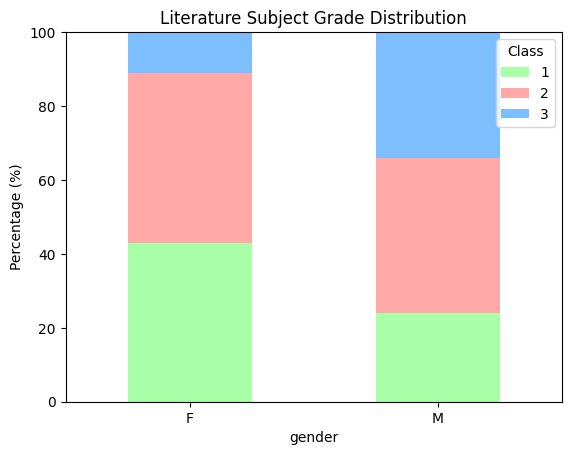

In [ ]:
# 시각화 - 누적 막대 그래프
plt.figure(figsize=(8, 5))
colors = ['#99ff99', '#ff9999', '#66b3ff']
pivot_liberal_arts_ratio.plot(kind='bar', stacked=True, color=colors, alpha=0.85)

plt.title("Literature Subject Grade Distribution")
plt.ylabel("Percentage (%)")
plt.legend(title="Class", loc='upper right')
plt.ylim(0, 100)
plt.xticks(rotation=0)

plt.show()

In [ ]:
# 성별에 따른 인문계열 과목 평균 성적
female_mean = liberal_arts_female.mean()
male_mean = liberal_arts_male.mean()

print("인문계열 과목 여학생 평균 성적:", female_mean)
print("인문계열 과목 남학생 평균 성적:", male_mean)

인문계열 과목 여학생 평균 성적: 1.6746987951807228
인문계열 과목 남학생 평균 성적: 2.0921052631578947


In [ ]:
# 인문계열 과목에서 성별에 따른 성적 빈도수 계산
contingency_table = pd.crosstab(df[df['Subject_Type'] == 'Literature']['gender'],
                                df[df['Subject_Type'] == 'Literature']['Class'])

# 카이제곱 검정 실행
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 검정 결과:")
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"p-value: {p}")

카이제곱 검정 결과:
Chi-Square Test Statistic: 17.270479693275835
p-value: 0.0001777309182540955


In [ ]:
# 자연/공학계열 과목의 성적 분포
science_df = df[df['Subject_Type'] == 'Science']

pivot_science = science_df.pivot_table(index='gender', columns='Class', aggfunc='size', fill_value=0)

pivot_science_ratio = pivot_science.div(pivot_science.sum(axis=1), axis=0) * 100
pivot_science_ratio = pivot_science_ratio.round(0)
pivot_science_ratio

Class,1,2,3
gender,,,
F,42.0,41.0,16.0
M,20.0,46.0,34.0


<Figure size 800x500 with 0 Axes>

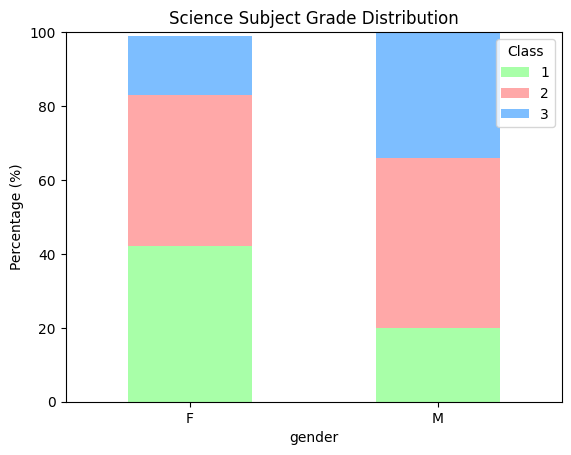

In [ ]:
# 시각화 - 누적 막대 그래프
plt.figure(figsize=(8, 5))
colors = ['#99ff99', '#ff9999', '#66b3ff']
pivot_science_ratio.plot(kind='bar', stacked=True, color=colors, alpha=0.85)

plt.title("Science Subject Grade Distribution")
plt.ylabel("Percentage (%)")
plt.legend(title="Class", loc='upper right')
plt.ylim(0, 100)
plt.xticks(rotation=0)

plt.show()

In [ ]:
# 성별에 따른 자연/공계열 과목 평균 성적
female_mean = science_female.mean()
male_mean = science_male.mean()

print("자연/공학계열 과목 여학생 평균 성적:", female_mean)
print("자연/공학계열 과목 남학생 평균 성적:", male_mean)

자연/공학계열 과목 여학생 평균 성적: 1.7391304347826086
자연/공학계열 과목 남학생 평균 성적: 2.1437908496732025


In [ ]:
# 자연/공학계열 과목에서 성별에 따른 성적 빈도수 계산
contingency_table = pd.crosstab(df[df['Subject_Type'] == 'Science']['gender'],
                                df[df['Subject_Type'] == 'Science']['Class'])

# 카이제곱 검정 실행
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 검정 결과:")
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"p-value: {p}")

카이제곱 검정 결과:
Chi-Square Test Statistic: 17.494306132968205
p-value: 0.00015891309674996514


<결론>

- 여학생의 경우, 인문계열 과목에서 더 높은 성적을 보인다.
- 가설로 예상했던 것과 달리 남학생의 경우, 자연/공학계열 과목에서 여학생보다 더 낮은 성적을 보인다.
- 카이제곱 검정 결과, p-value < 0.05 로 귀무가설을 기각하여 과목과 성별에 따른 성적의 차이가 통계적으로 유의미함을 보인다.
- 일반적으로 '문과는 여학생이, 이과는 남학생이 강세'라는 통념이 존재하지만, 두 계열 모두에서 여학생의 성적이 평균적으로 더 우수하다는 사실을 통계적으로 유의미하게 검정하며 예외적인 사례를 발견할 수 있었다.

[추가 의문] 여학생들과 남학생들의 선택 과목 차이가 있을까?

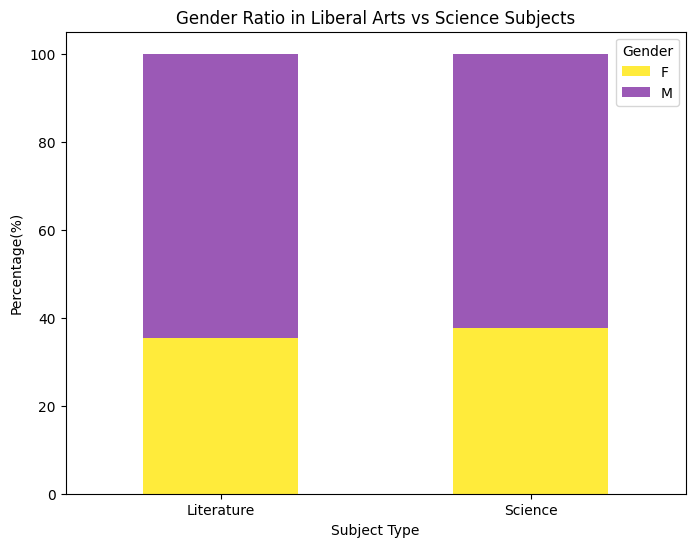

In [ ]:
Liberal_Arts = ["English", "Quran", "Spanish", "French", "History", "Arabic"]
Science = ["IT", "Math", "Science", "Biology", "Chemistry", "Geology"]

# 과목별 유형 할당
df["Subject_Type"] = df["Topic"].apply(lambda x: "Literature" if x in Liberal_Arts else "Science" if x in Science else "Other")

# 시각화 - 누적 막대 그래프
# 각 과목 유형별 남녀 비율
subject_gender_ratio = df.groupby(["Subject_Type", "gender"]).size().unstack()
subject_gender_ratio = subject_gender_ratio.div(subject_gender_ratio.sum(axis=1), axis=0)
subject_gender_ratio = subject_gender_ratio * 100

colors = ['#ffeb3b','#9b59b6']
subject_gender_ratio.plot(kind="bar", stacked=True, color=colors, figsize=(8,6))

plt.title("Gender Ratio in Liberal Arts vs Science Subjects")
plt.xlabel("Subject Type")
plt.ylabel("Percentage(%)")
plt.legend(title="Gender")
plt.xticks(rotation=0)

plt.show()

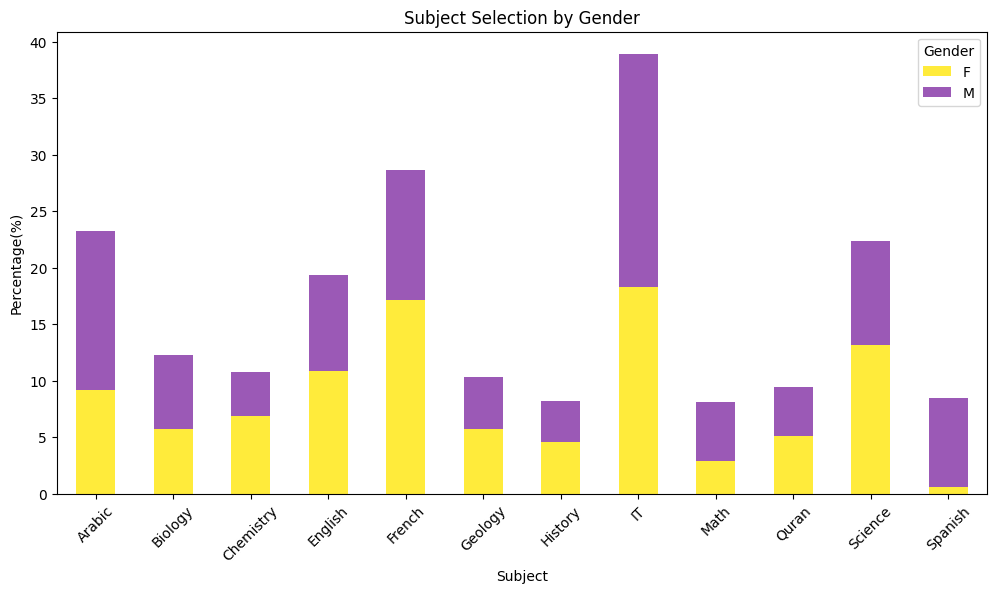

In [ ]:
# 시각화 - 누적 막대 그래프
gender_topic_counts = pd.crosstab(df['gender'], df['Topic'], normalize='index') * 100

colors = ['#ffeb3b','#9b59b6']
gender_topic_counts.T.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

plt.title("Subject Selection by Gender")
plt.xlabel("Subject")
plt.ylabel("Percentage(%)")
plt.legend(title="Gender")
plt.xticks(rotation=45)

plt.show()

<결론>
- 과목을 선택하는 것에 있어서 남녀비율의 차이가 크지 않다.


### **5. 국적과 성적에 대한 가설**
- 동 / 북아프리카 / 기타 지역으로 구분했을 때, 북아프리카 지역의 학생 평균 성적이 가장 낮을 것이다.
- 아랍권 / 비아랍권 국가로 나누었을 때, 비아랍권 국가의 학생 평균 성적이 더 높을 것이다.

In [ ]:
# 어떤 국가의 데이터가 있는지 확인
print(df['NationalITy'].unique())
print(df['NationalITy'].nunique())

['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
14


In [ ]:
import folium

# 지역별 국가 그룹화
region_colors = {
    "북아프리카": "red",
    "중동": "blue",
    "기타": "green"
}

# 국가별 위치 데이터
country_locations = {
    "KW": [29.3759, 47.9774],           # 쿠웨이트 (중동)
    "lebanon": [33.8547, 35.8623],      # 레바논 (중동)
    "Egypt": [26.8206, 30.8025],        # 이집트 (북아프리카)
    "SaudiArabia": [23.8859, 45.0792],  # 사우디아라비아 (중동)
    "USA": [37.0902, -95.7129],         # 미국 (기타)
    "Jordan": [30.5852, 36.2384],       # 요르단 (중동)
    "venzuela": [6.4238, -66.5897],     # 베네수엘라 (기타)
    "Iran": [32.4279, 53.6880],         # 이란 (중동)
    "Tunis": [33.8869, 9.5375],         # 튀니지 (북아프리카)
    "Morocco": [31.7917, -7.0926],      # 모로코 (북아프리카)
    "Syria": [34.8021, 38.9968],        # 시리아 (중동)
    "Palestine": [31.9522, 35.2332],    # 팔레스타인 (중동)
    "Iraq": [33.3152, 44.3661],         # 이라크 (중동)
    "Lybia": [26.3351, 17.2283]         # 리비아 (북아프리카)
}

# 지역 분류
country_regions = {
    "KW": "중동",
    "lebanon": "중동",
    "Egypt": "북아프리카",
    "SaudiArabia": "중동",
    "USA": "기타",
    "Jordan": "중동",
    "venzuela": "기타",
    "Iran": "중동",
    "Tunis": "북아프리카",
    "Morocco": "북아프리카",
    "Syria": "중동",
    "Palestine": "중동",
    "Iraq": "중동",
    "Lybia": "북아프리카"
}

# 지도 생성
world_map = folium.Map(location=[25, 25], zoom_start=3)

# 나라별 마커 추가
for country, coords in country_locations.items():
    region = country_regions[country]
    color = region_colors[region]

    folium.Marker(
        location=coords,
        popup=f"{country} ({region})",
        icon=folium.Icon(color=color, icon="info-sign")
    ).add_to(world_map)

world_map

In [ ]:
# 지역별 분류 - 중동 / 북아프리카 / 기타 지역
df['location'] = df['NationalITy'].map({
    'KW': 'MIDDLE EAST',
    'lebanon': 'MIDDLE EAST',
    'Egypt': 'NORTH AFRICA',
    'SaudiArabia': 'MIDDLE EAST',
    'USA': 'etc',
    'Jordan': 'MIDDLE EAST',
    'venzuela': 'etc',
    'Iran': 'MIDDLE EAST',
    'Tunis': 'NORTH AFRICA',
    'Morocco': 'NORTH AFRICA',
    'Syria': 'MIDDLE EAST',
    'Palestine': 'MIDDLE EAST',
    'Iraq': 'MIDDLE EAST',
    'Lybia': 'NORTH AFRICA'})

In [ ]:
# 지역별 Class 3 학생 비율
low_ratio_location = df.groupby(by='location')['Class'].apply(lambda x: (x == 3).sum() / len(x) * 100)

low_ratio_location_sorted = low_ratio_location.sort_values(ascending=False)
low_ratio_location_sorted

,Class
location,
NORTH AFRICA,45.161290
MIDDLE EAST,25.339367
etc,14.285714


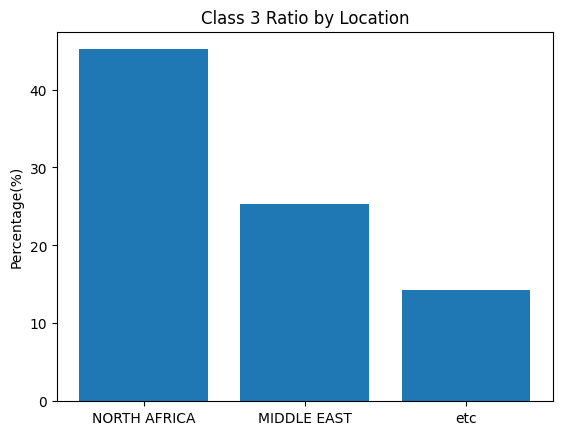

In [ ]:
# 시각화
plt.bar(low_ratio_location_sorted.index, low_ratio_location_sorted.values)
plt.title('Class 3 Ratio by Location')
plt.ylabel('Percentage(%)')

plt.show()

In [ ]:
# 지역(location)별 성적 분포
contingency_table = pd.crosstab(df['location'], df['Class'])

# 카이제곱 검정 실행
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 검정 결과:")
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"p-value: {p}")

카이제곱 검정 결과:
Chi-Square Test Statistic: 8.559031976678016
p-value: 0.07311793717777568


<결론>
- 북아프리카 지역의 학생 평균 성적이 가장 낮은 것을 볼 수 있다.
- Kruskal-Wallis 검정 결과, p-value < 0.05 로 귀무가설을 기각하여 지역에 따른 성적의 차이가 통계적으로 유의미함을 보인다.
- **그러나, 이는 중동 / 비중동 데이터의 수가 균일하지 않기 때문에 해석에 유의가 필요하다.**

In [ ]:
# 아랍권 / 비아랍권 구분
df['Arab'] = df['NationalITy'].map({
    'KW': 'Arab world',
    'lebanon': 'Arab world',
    'Egypt': 'Arab world',
    'SaudiArabia': 'Arab world',
    'USA': 'non-Arab',
    'Jordan': 'Arab world',
    'venzuela': 'non-Arab',
    'Iran': 'non-Arab',
    'Tunis': 'Arab world',
    'Morocco': 'Arab world',
    'Syria': 'Arab world',
    'Palestine': 'Arab world',
    'Iraq': 'Arab world',
    'Lybia': 'Arab world'})

In [ ]:
# 국가별 분류 - 아랍권 / 비아랍권 국가
# 🟢 아랍권: 초록색 / 🔴 비아랍권: 빨간색
region_colors = {
    "아랍권": "green",
    "비아랍권": "red"
}

country_regions = {
    "KW": "아랍권",
    "lebanon": "아랍권",
    "Egypt": "아랍권",
    "SaudiArabia": "아랍권",
    "USA": "비아랍권",
    "Jordan": "아랍권",
    "venzuela": "비아랍권",
    "Iran": "비아랍권",
    "Tunis": "아랍권",
    "Morocco": "아랍권",
    "Syria": "아랍권",
    "Palestine": "아랍권",
    "Iraq": "아랍권",
    "Lybia": "아랍권"
}

# 지도 생성
world_map = folium.Map(location=[25, 25], zoom_start=3)

# 나라별 마커 추가
for country, coords in country_locations.items():
    region = country_regions[country]
    color = region_colors[region]

    folium.Marker(
        location=coords,
        popup=f"{country} ({region})",
        icon=folium.Icon(color=color, icon="info-sign")
    ).add_to(world_map)

world_map

In [ ]:
# 국가별 Class 3 학생 비율
low_ratio_arab = df.groupby(by='Arab')['Class'].apply(lambda x: (x == 3).sum() / len(x) * 100)

low_ratio_arab_sorted = low_ratio_arab.sort_values(ascending=False)
low_ratio_arab_sorted

,Class
Arab,
Arab world,26.552463
non-Arab,23.076923


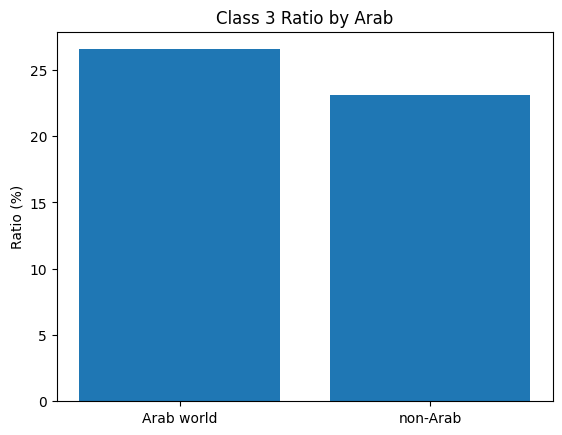

In [ ]:
# 시각화
plt.bar(low_ratio_arab_sorted.index, low_ratio_arab_sorted.values)
plt.title('Class 3 Ratio by Arab')
plt.ylabel('Ratio (%)')

plt.show()

In [ ]:
# 아랍권 vs 비아랍권 성적 분포 (범주형)
contingency_table = pd.crosstab(df['Arab'], df['Class'])

# 카이제곱 검정 실행
chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 검정 결과")
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"p-value: {p}")

카이제곱 검정 결과
Chi-Square Test Statistic: 0.07874733026435037
p-value: 0.9613914035746767


<결론>

- 비아랍권 국가의 학생 평균 성적이 더 높을 것이라고 예상하였고, 데이터를 시각화하였을 때 TRUE인 것으로 보이나, **통계적으로 유의미하지 않았다.**
- 결과적으로 문화권은 성적을 결정짓는 핵심 요인이 아님을 알 수 있었다.